<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 3 - Phase 1 - eyamrog

This phase aims to compile the EL2AP corpus (Human-Authored Target Corpus).

- **Definition of text**:
    - Academic research articles;
    - Organised in sections: Abstract, Introduction, Literature Review, Methodology, Results, Discussion, Conclusion, Acknowledgements;
    - Paragraphs longer than or equal to 10 words.

## Required Python packages

- pandas
- nltk

## Importing the required libraries

In [1]:
import pandas as pd
import os
import sys
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

## Defining input variables

In [2]:
input_directory = 'cl_st3_ph1_eyamrog'
output_directory = 'cl_st3_ph1_eyamrog'

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory already exists.


### Import the data into a DataFrame

In [4]:
df_el2ap = pd.read_json(f'{input_directory}/scielo_chatgpt_erpp_pp.jsonl', lines=True)

In [5]:
df_el2ap.dtypes

Title                     object
URL                       object
Authors                   object
Published                 object
PDF Language              object
PDF URL                   object
Submitted                  int64
Posted                     int64
Text ID                   object
Area of Knowledge         object
Section                   object
Paragraph                 object
Text Paragraph            object
Text Paragraph ChatGPT    object
dtype: object

In [6]:
df_el2ap['Submitted'] = pd.to_datetime(df_el2ap['Submitted'], unit='ms')
df_el2ap['Posted'] = pd.to_datetime(df_el2ap['Posted'], unit='ms')

In [7]:
df_el2ap

Title  \
0      (Fern flora of Viçosa, Minas Gerais State, Bra...   
1      (Fern flora of Viçosa, Minas Gerais State, Bra...   
2      (Fern flora of Viçosa, Minas Gerais State, Bra...   
3      (Fern flora of Viçosa, Minas Gerais State, Bra...   
4      (Fern flora of Viçosa, Minas Gerais State, Bra...   
...                                                  ...   
11522  COVID-19 in Brazil: advantages of a socialized...   
11523  COVID-19 in Brazil: advantages of a socialized...   
11524  COVID-19 in Brazil: advantages of a socialized...   
11525  COVID-19 in Brazil: advantages of a socialized...   
11526  COVID-19 in Brazil: advantages of a socialized...   

                                                     URL  \
0      https://preprints.scielo.org/index.php/scielo/...   
1      https://preprints.scielo.org/index.php/scielo/...   
2      https://preprints.scielo.org/index.php/scielo/...   
3      https://preprints.scielo.org/index.php/scielo/...   
4      https://preprints.scielo.org/index.php/scielo/...   
...                                                  ...   
11522  https://preprints.scielo.org/index.php/scielo/...   
11523  https://preprints.scielo.org/index.php/scielo/...   
11524  https://preprints.scielo.org/index.php/scielo/...   
11525  https://preprints.scielo.org/index.php/scielo/...   
11526  https://preprints.scielo.org/index.php/scielo/...   

                                                 Authors  \
0        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
1        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
2        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
3        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
4        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
...                                                  ...   
11522  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11523  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11524  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11525  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11526  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   

                                      Published PDF Language  \
0      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
1      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
2      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
3      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
4      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
...                                         ...          ...   
11522  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11523  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11524  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11525  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11526  Submitted 04/06/2020 - Posted 04/08/2020          PDF   

                                                 PDF URL  Submitted  \
0      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
1      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
2      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
3      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
4      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
...                                                  ...        ...   
11522  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11523  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11524  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11525  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11526  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   

          Posted  Text ID    Area of Knowledge  \
0     2022-11-23  t000000  Biological Sciences   
1     2022-11-23  t000000  Biological Sciences   
2     2022-11-23  t000000  Biological Sciences   
3     2022-11-23  t000000  Biological Sciences   
4     2022-11-23

## Data Wrangling

### Paragraphs that could not be interpreted by ChatGPT

Those paragraphs are identified by the following ChatGPT responses:
- 'Of course. Please provide the passage **you would like me to improve**.'
- 'It appears that your message is incomplete. Please provide the passage **you would like me to improve**.'
- 'Certainly. Please provide the passage **you would like me to improve**.'
- 'Certainly! Please provide the passage **you would like me to improve**.'

In [8]:
# Get the indexes of rows containing the phrase 'you would like me to improve'
index_list_with_phrase = df_el2ap[df_el2ap['Text Paragraph ChatGPT'].str.contains('you would like me to improve', na=False)].index.tolist()

In [9]:
len(index_list_with_phrase)

20

In [10]:
print(index_list_with_phrase)

[3411, 3429, 4877, 5043, 5066, 5075, 6612, 6624, 6626, 6628, 6630, 6634, 6636, 6638, 6645, 6647, 7743, 7918, 8165, 10073]


### Paragraphs shorter than 10 words

In [11]:
# Slice the DataFrame where 'Text Paragraph' contains fewer than 10 words
df_less_than_10_words = df_el2ap[df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split())) < 10]

In [12]:
# Write the contents of the column 'Text Paragraph' to a text file
df_less_than_10_words['Text Paragraph'].to_csv(f"{output_directory}/df_less_than_10_words.txt", index=False, header=False)

In [13]:
# Get the indexes of rows where 'Text Paragraph' contains less than 10 words
index_list_less_than_10_words = df_el2ap[df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split())) < 10].index.tolist()

In [14]:
len(index_list_less_than_10_words)

391

### Consolidate an index list for filtering the DataFrame

In [15]:
# Merge the two lists, remove duplicates, and sort in descending order
index_list_for_filtering = sorted(set(index_list_with_phrase + index_list_less_than_10_words), reverse=True)

In [16]:
len(index_list_for_filtering)

391

### Dropping the filtered rows

In [17]:
df_el2ap.drop(index_list_for_filtering, inplace=True)

In [18]:
df_el2ap

Title  \
0      (Fern flora of Viçosa, Minas Gerais State, Bra...   
1      (Fern flora of Viçosa, Minas Gerais State, Bra...   
2      (Fern flora of Viçosa, Minas Gerais State, Bra...   
3      (Fern flora of Viçosa, Minas Gerais State, Bra...   
4      (Fern flora of Viçosa, Minas Gerais State, Bra...   
...                                                  ...   
11522  COVID-19 in Brazil: advantages of a socialized...   
11523  COVID-19 in Brazil: advantages of a socialized...   
11524  COVID-19 in Brazil: advantages of a socialized...   
11525  COVID-19 in Brazil: advantages of a socialized...   
11526  COVID-19 in Brazil: advantages of a socialized...   

                                                     URL  \
0      https://preprints.scielo.org/index.php/scielo/...   
1      https://preprints.scielo.org/index.php/scielo/...   
2      https://preprints.scielo.org/index.php/scielo/...   
3      https://preprints.scielo.org/index.php/scielo/...   
4      https://preprints.scielo.org/index.php/scielo/...   
...                                                  ...   
11522  https://preprints.scielo.org/index.php/scielo/...   
11523  https://preprints.scielo.org/index.php/scielo/...   
11524  https://preprints.scielo.org/index.php/scielo/...   
11525  https://preprints.scielo.org/index.php/scielo/...   
11526  https://preprints.scielo.org/index.php/scielo/...   

                                                 Authors  \
0        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
1        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
2        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
3        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
4        Nelson Túlio Lage Pena, Pedro Bond Schwartsburd   
...                                                  ...   
11522  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11523  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11524  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11525  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   
11526  Julio Croda, Wanderson Kleber de  Oliveira, Ro...   

                                      Published PDF Language  \
0      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
1      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
2      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
3      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
4      Submitted 11/22/2022 - Posted 11/23/2022          PDF   
...                                         ...          ...   
11522  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11523  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11524  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11525  Submitted 04/06/2020 - Posted 04/08/2020          PDF   
11526  Submitted 04/06/2020 - Posted 04/08/2020          PDF   

                                                 PDF URL  Submitted  \
0      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
1      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
2      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
3      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
4      https://preprints.scielo.org/index.php/scielo/... 2022-11-22   
...                                                  ...        ...   
11522  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11523  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11524  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11525  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   
11526  https://preprints.scielo.org/index.php/scielo/... 2020-04-06   

          Posted  Text ID    Area of Knowledge  \
0     2022-11-23  t000000  Biological Sciences   
1     2022-11-23  t000000  Biological Sciences   
2     2022-11-23  t000000  Biological Sciences   
3     2022-11-23  t000000  Biological Sciences   
4     2022-11-23

### Minimum and maximum paragraph lengths in the column `Text Paragraph`

In [19]:
# Calculate the length of each paragraph
paragraph_lengths = df_el2ap['Text Paragraph'].apply(lambda x: len(str(x).split()))

# Get the minimum and maximum lengths
min_length = paragraph_lengths.min()
max_length = paragraph_lengths.max()

# Display the results
min_length, max_length

(10, 503)

### Minimum and maximum paragraph lengths in the column `Text Paragraph ChatGPT`

In [20]:
# Calculate the length of each paragraph
paragraph_lengths_chatgpt = df_el2ap['Text Paragraph ChatGPT'].apply(lambda x: len(str(x).split()))

# Get the minimum and maximum lengths
min_length_chatgpt = paragraph_lengths.min()
max_length_chatgpt = paragraph_lengths.max()

# Display the results
min_length_chatgpt, max_length_chatgpt

(10, 503)

### Identifying characters that could be problematic for processing

#### In column `Text Paragraph`

In [21]:
# Combine all paragraphs into a single string
combined_text = ''.join(df_el2ap['Text Paragraph'].dropna())

# Get the set of unique characters
unique_characters = set(combined_text)

# Display the set of characters
print(unique_characters)

{'ǧ', 'σ', '𝑖', 'ô', 'Δ', '●', '𝒇', '\u200b', '⋯', '𝑣', '5', '¹', 'ϒ', 'Ω', '𝜎', '\xad', '𝐵', '𝑓', '¼', '𝜌', 'A', 'η', '[', '𝑞', '²', 'ũ', 'l', '𝜀', 'Ɣ', '|', 'Õ', '1', '𝑤', 'ℛ', '7', 'r', '𝐺', 'å', '¨', 'Z', '„', 'º', '𝐼', 'õ', '‒', '𝑠', '𝑐', '𝛾', 'š', '𝒊', 'ε', 'T', '!', '”', '̅', '𝝌', 'j', ';', 'Ć', 'p', '6', 'γ', '↓', 'm', 'H', 'Ñ', ')', 'h', 'à', '_', '(', '𝜖', '/', '𝐹', '―', '™', 'Ⓡ', 'ﬂ', 'Ú', 'ã', '.', 'Š', 'n', 'y', '𝑘', '′', '̧', '̃', 'É', 'Ğ', '𝑧', '£', '″', 'e', 'À', '≥', 'é', 'ó', 'ç', '‘', '8', '>', '»', '-', 'ɳ', 'ª', '+', '𝑆', '4', '∞', '€', '\uf05d', ' ', 'I', 'a', 'K', 'L', 'τ', 'ć', '𝑋', '𝜅', 'ś', '𝑝', '}', '©', 'â', '\\', 'ò', '\uf05b', '{', 'ť', '𝛥', '‑', 'Á', '𝑊', 'b', '∋', '#', '𝑚', 'x', '𝐴', '𝑃', 'G', 'β', '𝑑', '½', '*', 'Ç', 's', 'W', '×', 'B', '$', 'ˆ', '𝑇', '𝑎', '•', 'χ', '˚', 'Ø', 'ú', 'θ', 'Ü', '𝛼', '2', '0', '𝜑', '∈', 'ı', '❤', 'O', '⇒', '—', '𝑜', '⋅', 'ℎ', 'Í', '³', '𝑏', '∆', 'č', '𝑙', '𝑅', '𝑟', '𝑍', 'N', '≠', 'α', ':', ',', '≅', '≤', '𝜇', 'ﬁ', '∗', '𝑔', 

#### In column `Text Paragraph ChatGPT`

In [22]:
# Combine all paragraphs into a single string
combined_text_chatgpt = ''.join(df_el2ap['Text Paragraph ChatGPT'].dropna())

# Get the set of unique characters
unique_characters_chatgpt = set(combined_text)

# Display the set of characters
print(unique_characters_chatgpt)

{'ǧ', 'σ', '𝑖', 'ô', 'Δ', '●', '𝒇', '\u200b', '⋯', '𝑣', '5', '¹', 'ϒ', 'Ω', '𝜎', '\xad', '𝐵', '𝑓', '¼', '𝜌', 'A', 'η', '[', '𝑞', '²', 'ũ', 'l', '𝜀', 'Ɣ', '|', 'Õ', '1', '𝑤', 'ℛ', '7', 'r', '𝐺', 'å', '¨', 'Z', '„', 'º', '𝐼', 'õ', '‒', '𝑠', '𝑐', '𝛾', 'š', '𝒊', 'ε', 'T', '!', '”', '̅', '𝝌', 'j', ';', 'Ć', 'p', '6', 'γ', '↓', 'm', 'H', 'Ñ', ')', 'h', 'à', '_', '(', '𝜖', '/', '𝐹', '―', '™', 'Ⓡ', 'ﬂ', 'Ú', 'ã', '.', 'Š', 'n', 'y', '𝑘', '′', '̧', '̃', 'É', 'Ğ', '𝑧', '£', '″', 'e', 'À', '≥', 'é', 'ó', 'ç', '‘', '8', '>', '»', '-', 'ɳ', 'ª', '+', '𝑆', '4', '∞', '€', '\uf05d', ' ', 'I', 'a', 'K', 'L', 'τ', 'ć', '𝑋', '𝜅', 'ś', '𝑝', '}', '©', 'â', '\\', 'ò', '\uf05b', '{', 'ť', '𝛥', '‑', 'Á', '𝑊', 'b', '∋', '#', '𝑚', 'x', '𝐴', '𝑃', 'G', 'β', '𝑑', '½', '*', 'Ç', 's', 'W', '×', 'B', '$', 'ˆ', '𝑇', '𝑎', '•', 'χ', '˚', 'Ø', 'ú', 'θ', 'Ü', '𝛼', '2', '0', '𝜑', '∈', 'ı', '❤', 'O', '⇒', '—', '𝑜', '⋅', 'ℎ', 'Í', '³', '𝑏', '∆', 'č', '𝑙', '𝑅', '𝑟', '𝑍', 'N', '≠', 'α', ':', ',', '≅', '≤', '𝜇', 'ﬁ', '∗', '𝑔', 

### Export to a file

In [23]:
df_el2ap.to_json(f"{output_directory}/df_el2ap.jsonl", orient='records', lines=True)

In [24]:
df_el2ap.to_excel(f"{output_directory}/df_el2ap.xlsx")

## Word Count

### Calculate word counts for columns `Text Paragraph` and `Text Paragraph ChatGPT`

In [25]:
# Download the required NLTK data (only if you haven't already)
nltk.download('punkt')

# Create the new column 'Text Paragraph Word Count'
df_el2ap['Text Paragraph Word Count'] = df_el2ap['Text Paragraph'].apply(lambda x: len(word_tokenize(str(x))))

# Create the new column 'Text Paragraph ChatGPT Word Count'
df_el2ap['Text Paragraph ChatGPT Word Count'] = df_el2ap['Text Paragraph ChatGPT'].apply(lambda x: len(word_tokenize(str(x))))

[nltk_data] Downloading package punkt to /home/eyamrog/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### `EL2AP` and `AI-EL2AP` corpora number of texts

In [26]:
# Calculate the number of unique values in the 'Text ID' column
num_unique_text_ids = df_el2ap['Text ID'].nunique()

# Display the result
num_unique_text_ids

316

### `EL2AP` and `AI-EL2AP` corpora number of paragraphs

In [27]:
df_el2ap.shape[0]

11136

### `EL2AP` corpus number of tokens

In [28]:
# Calculate the total number of words
total_word_count = df_el2ap['Text Paragraph Word Count'].sum()

# Display the total word count
total_word_count

1194574

### `AI-EL2AP` corpus number of tokens

In [29]:
# Calculate the total number of words
total_word_count_chatgpt = df_el2ap['Text Paragraph ChatGPT Word Count'].sum()

# Display the total word count
total_word_count_chatgpt

1206295

## Determining the best balancing

In [30]:
# Group by 'Area of Knowledge' and calculate the required metrics
df_balancing = df_el2ap.groupby('Area of Knowledge').agg(
    Text_Counts=('Text ID', lambda x: x.nunique()),  # Count unique Text IDs
    Paragraph_Counts=('Text ID', 'size')  # Count number of paragraphs (rows)
).reset_index()

# Rename the columns
df_balancing.rename(columns={
    'Text_Counts': 'Text Counts',
    'Paragraph_Counts': 'Paragraph Counts'
}, inplace=True)

# Sort the DataFrame by 'Text Counts' in descending order
df_balancing = df_balancing.sort_values(by='Text Counts', ascending=False).reset_index(drop=True)

# Add 'Balanced Paragraph Counts' using direct computation with the index
df_balancing['Balanced Paragraph Counts'] = df_balancing['Paragraph Counts'] * (df_balancing.index + 1)

# Display the DataFrame
df_balancing

Area of Knowledge  Text Counts  Paragraph Counts  \
0                  Health Sciences          186              5431   
1              Biological Sciences           50              1492   
2                   Human Sciences           27              1283   
3          Applied Social Sciences           24              1272   
4  Linguistic, literature and arts           15              1030   
5                      Engineering            6               213   
6         Exact and Earth Sciences            5               300   
7            Agricultural Sciences            3               115   

   Balanced Paragraph Counts  
0                       5431  
1                       2984  
2                       3849  
3                       5088  
4                       5150  
5                       1278  
6                       2100  
7                        920

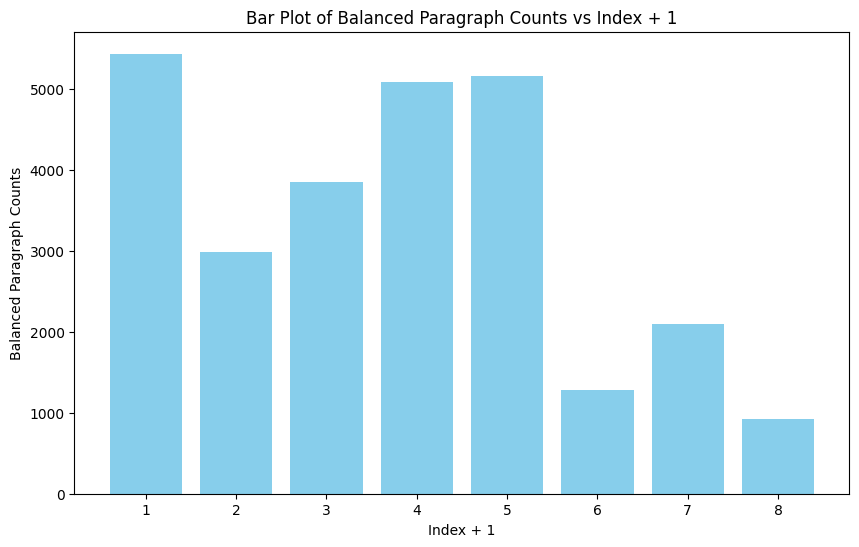

In [31]:
# X-axis: Index + 1
x_axis = df_balancing.index + 1

# Y-axis: Balanced Paragraph Counts
y_axis = df_balancing['Balanced Paragraph Counts']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='skyblue')

# Adding labels and title
plt.xlabel('Index + 1')
plt.ylabel('Balanced Paragraph Counts')
plt.title('Bar Plot of Balanced Paragraph Counts vs Index + 1')
plt.xticks(x_axis)  # Ensure all indices are shown

# Show the plot
plt.show()

Therefore, `Engineering`, `Exact and Earth Sciences` and `Agricultural Sciences` should be removed.